## Analysis of Additional Questions 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import random
import missingno as msno
from datetime import datetime

#to see plot directly  instead giving plt.show()
%matplotlib inline
%reload_ext autoreload 
%autoreload 2

In [2]:
# Creating DataFrame for Labs
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Labs")

# Creating DataFrame for Demography
df_Demography = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Demography")

# Creating Dataframe for Hospitalization_Discharge
df_HospitalDischarge = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Hospitalization_Discharge")

# Creating Dataframe for CardiacComplications
df_CardiacComplication = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "CardiacComplications")

# Creating Dataframe for Responsivenes
df_Responsive = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Responsivenes")

# Creating Dataframe for PatientHistory
df_PatientHistory = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "PatientHistory")

# Creating Dataframe for Patient_Precriptions
df_PatientPrecription = pd.read_excel("Cardiac_Outcomes.xlsx" ,sheet_name = "Patient_Precriptions")

#### Question 1 : What insights can be drawn from age and gender distribution across different discharge departments?

C:\Users\Lakshmi\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lakshmi\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lakshmi\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lakshmi\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

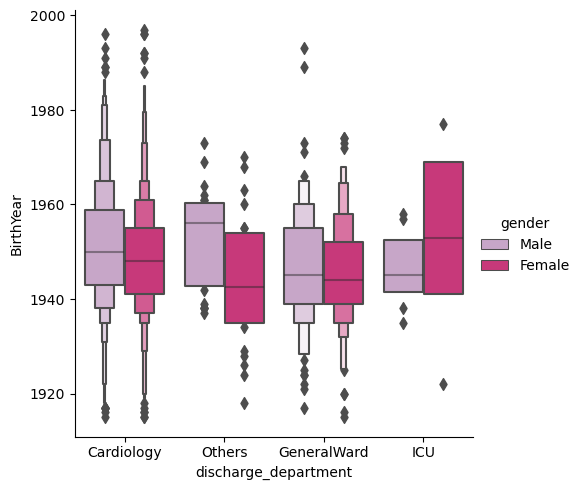

In [3]:
def random_age(age):
    numbers = age.split('-')
    return random.randint(int(numbers[0]), int(numbers[1]))

df_Demography['Age'] = df_Demography['ageCat'].apply(random_age)
import datetime
# Function to calculate the birth year based on the age
# The current year is calculated using the datetime module
# The birth year is calculated by subtracting the age from the current year
def calculate_birth_year(age):
    current_year = datetime.datetime.now().year
    birth_year = current_year - age
    return birth_year
df_Demography['BirthYear'] = df_Demography['Age'].apply(calculate_birth_year)
Boxen_df = pd.merge(df_Demography, df_HospitalDischarge, on='inpatient_number', how='left')
sns.catplot(x='discharge_department', y='BirthYear',hue='gender', data=Boxen_df, kind="boxen", palette = 'PuRd')

#### Question 2: What is the average age of patients who were readmitted within 28 days?

In [4]:
df = pd.merge(df_HospitalDischarge, df_Demography, on='inpatient_number')
df = pd.merge(df, df_PatientHistory, on='inpatient_number')


In [5]:
avg_age_readmit_28_days = df[df['re_admission_within_28_days'] == 1]['Age'].mean()
print(avg_age_readmit_28_days)

75.82142857142857


####  Question 3: How many patients required respiratory support and were readmitted within 3 months?

In [6]:
respiratory_support_readmit_3_months = df[(df['respiratory_support'] == 1) & (df['re_admission_within_3_months'] == 1)].shape[0]
print(respiratory_support_readmit_3_months)

0


####  Question 4 : What is the gender distribution of patients who died within 6 months? 

In [7]:
gender_distribution_death_6_months = df[df['death_within_6_months'] == 1]['gender'].value_counts()
print(gender_distribution_death_6_months)

gender
Male      29
Female    28
Name: count, dtype: int64


####  Question 5: What is the most common occupation of patients who were admitted to the hospital more than once?

In [8]:
common_occupation_multiple_admissions = df[df['visit_times'] > 1]['occupation'].mode()[0]
print(common_occupation_multiple_admissions)

UrbanResident


####  Question 6: What is the most common discharge department for patients who were readmitted within 3 months?

In [9]:
common_discharge_department_readmit_3_months = df[df['re_admission_within_3_months'] == 1]['discharge_department'].mode()[0]
print(common_discharge_department_readmit_3_months)

Cardiology


#### Question 7: Plot a histogram of the ages of all patients. What is the most common age group among the patients?

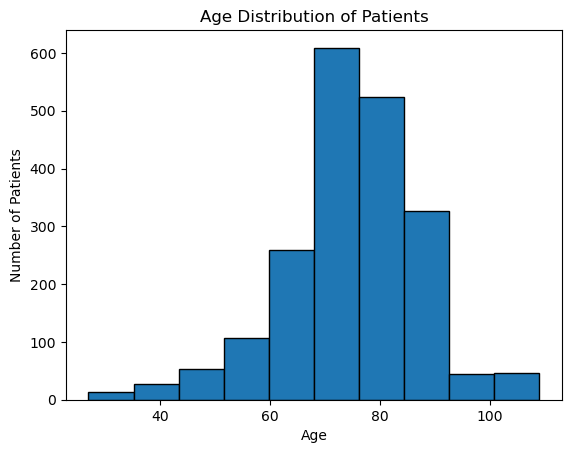

In [10]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

#### Question 8 : Plot a bar chart showing the number of male and female patients. Which gender is more common among the patients?

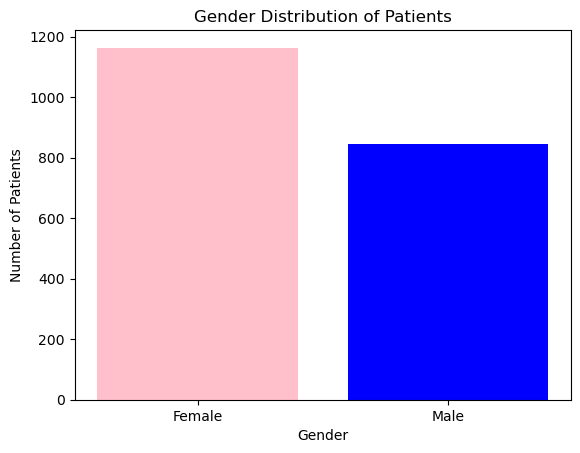

In [11]:
gender_counts = df['gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

####  Question 9: What is the average BMI of patients with Chronic obstructive pulmonary disease who returned to the emergency department within 6 months? 

In [12]:
avg_bmi_COPD_return_6_months = df[(df['Chronic_obstructive_pulmonary_disease'] == 1) & (df['return_to_emergency_department_within_6_months'] == 1)]['BMI'].mean
print(avg_bmi_COPD_return_6_months)

<bound method Series.mean of 3       22.491349
38      17.578125
40      19.631118
42      30.468750
62      19.031142
          ...    
1908    20.028673
1943    13.333333
1976    19.531250
1977    19.531250
1993    15.235261
Name: BMI, Length: 87, dtype: float64>


####  Question 10: calculates the percentage of patients with each disease who were readmitted within 28 days.

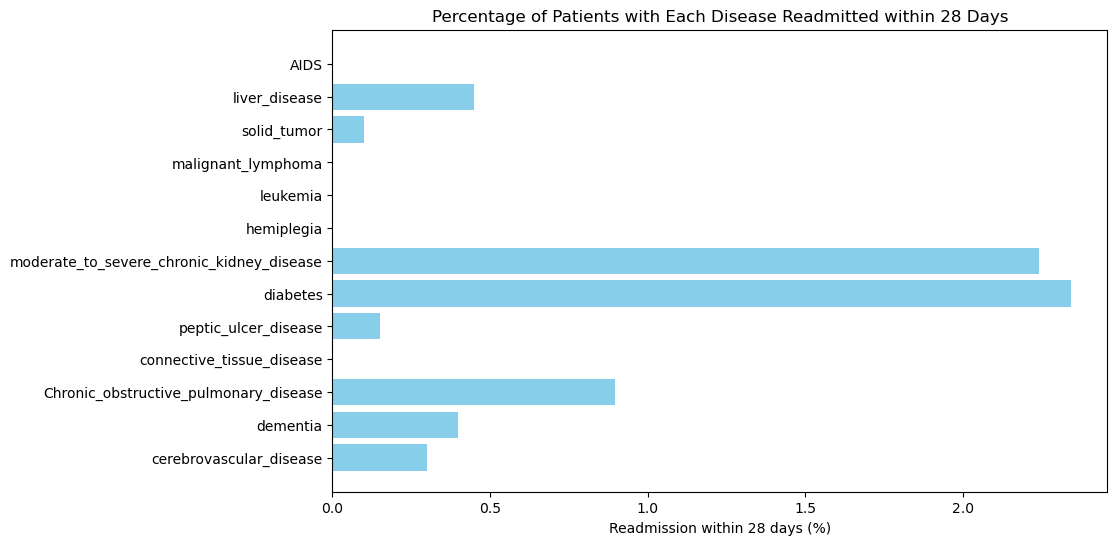

In [13]:
def calculate_readmission_percentages(df):
    disease_columns = ['cerebrovascular_disease', 'dementia', 'Chronic_obstructive_pulmonary_disease', 
                       'connective_tissue_disease', 'peptic_ulcer_disease', 'diabetes', 
                       'moderate_to_severe_chronic_kidney_disease', 'hemiplegia', 'leukemia', 
                       'malignant_lymphoma', 'solid_tumor', 'liver_disease', 'AIDS']
    
    readmission_percentages = []
    for disease in disease_columns:
        total_patients = df[df[disease] == 1].shape[0]
        readmitted_patients = df[(df[disease] == 1) & (df['re_admission_within_28_days'] == 1)].shape[0]
        readmission_percentage = (readmitted_patients / 2008) * 100
        readmission_percentages.append(readmission_percentage)
    
    return disease_columns, readmission_percentages

diseases, readmission_percentages = calculate_readmission_percentages(df)

plt.figure(figsize=(10, 6))
plt.barh(diseases, readmission_percentages, color='skyblue')
plt.xlabel('Readmission within 28 days (%)')
plt.title('Percentage of Patients with Each Disease Readmitted within 28 Days')
plt.show()

#### Question 11: What is patient weight based on patient id weight and height?

In [14]:
Patient_id = input("Enter your inpatient_number	 :  ")
weight = float(input("Enter your weight in Kg:  "))
Height =float(input("Enter your height in meters:  "))
BMI = weight  / (Height * Height)
print(BMI)
if BMI > 0:
    if BMI <18.5:
        print(Patient_id + ',is underweight')
    elif BMI <= 24.9:
        print(Patient_id + ',is Normal weight')
    elif BMI <= 39.9:
         print(Patient_id + ',is Over weight')
    else: print(Patient_id + ',is Obese')

Enter your inpatient_number	 :  743087
Enter your weight in Kg:  22
Enter your height in meters:  36
0.016975308641975308
743087,is underweight


In [15]:
# 12. How many people are suffering with breathing problem? 

oxygenTherapyCount = df_HospitalDischarge['oxygen_inhalation'].value_counts()['OxygenTherapy']

print("Count of patients using OxygenTherapy for breathing problem : ", oxygenTherapyCount)


Count of patients using OxygenTherapy for breathing problem :  1898


   gender  diabetes
0  Female      1163
1    Male       845


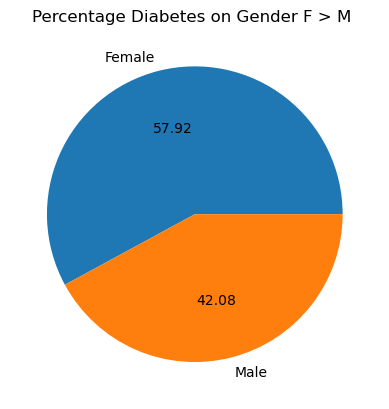

In [16]:
# 13. How many men and women have diabetes in a chart showing which category is higher

Merge_df= pd.merge(df_Demography, df_PatientHistory, on='inpatient_number', how='left')

gender_diabetes = Merge_df.groupby('gender')['diabetes'].count().reset_index()

print(gender_diabetes)

plt.title('Percentage Diabetes on Gender F > M ')
plt.pie(gender_diabetes['diabetes'], labels = gender_diabetes['gender'], autopct='%.2f')
plt.show()

In [17]:
# 14. Percentage of gender who have normal creatinine enzymatic method

import seaborn as sns
Merge_df= pd.merge(df_Demography, df_Labs, on='inpatient_number', how='left')

gender_creatine = Merge_df[['gender', 'creatinine_enzymatic_method']]
# Ref: Normal (61.9 to 114.9 µmol/L) for men and (53 to 97.2 µmol/L) for women

maleCount = len(list(filter(lambda x: x == 'Male', gender_creatine['gender'])))
femaleCount = len(list(filter(lambda x: x == 'Female', gender_creatine['gender'])))

count_of_Male_Normal = count_of_Female_Normal = count_of_patientsNotNormal = 0
for index, row in gender_creatine.iterrows():
    gender = row['gender']
    value = row['creatinine_enzymatic_method']
    if gender == 'Male' and value >= 61.9 and value <= 114.9:
        count_of_Male_Normal += 1;
    elif gender == 'Female' and 53 <= value <= 97.2:
        count_of_Female_Normal += 1;
    else:
        count_of_patientsNotNormal +=1


print('\n Percentage of Gender who have normal creatinine enzymatic method')
mpercent = (count_of_Male_Normal/maleCount)*100
fpercent = (count_of_Female_Normal/femaleCount)*100
if mpercent > fpercent:
    print("\n Male Gender is having", mpercent ,"%' which is higher than Female \n")
elif fpercent > mpercent:
    print("\n Female Gender is having", fpercent ,"%' which is higher than Male \n ")


 Percentage of Gender who have normal creatinine enzymatic method

 Male Gender is having 54.082840236686394 %' which is higher than Female 



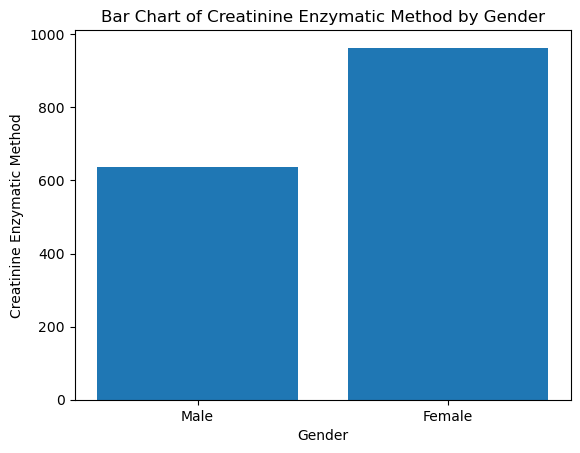

In [18]:
# 15. Percentage of creatinine enzymatic method values by gender 

gender = gender_creatine['gender']
value = gender_creatine['creatinine_enzymatic_method']

plt.bar(gender, value)
plt.xlabel('Gender')
plt.ylabel('Creatinine Enzymatic Method')
plt.title('Bar Chart of Creatinine Enzymatic Method by Gender')
plt.show()

In [25]:
# 16. Calculate LDL-HDL ratio and  categorize into: (ideal: under 2.0, good: under 5.0,bad: over 5.0)

# Assuming df_Labs is the original DataFrame
df_Labs_copy = df_Labs.copy()

# Calculate LDL/HDL ratio and round to 2 decimal places
df_Labs_copy['LDL_HDL_Ratio'] = round(df_Labs_copy['low_density_lipoprotein_cholesterol'] / df_Labs_copy['high_density_lipoprotein_cholesterol'], 2)

# Initialize 'Heart Condition' with default values
df_Labs_copy['Heart Condition'] = np.nan

# Assign 'Heart Condition' based on the calculated 'LDL_HDL_Ratio'
df_Labs_copy.loc[df_Labs_copy['LDL_HDL_Ratio'] == 0, 'Heart Condition'] = 'No Data'
df_Labs_copy.loc[df_Labs_copy['LDL_HDL_Ratio'] < 2.00, 'Heart Condition'] = 'Ideal Condition'
df_Labs_copy.loc[(df_Labs_copy['LDL_HDL_Ratio'] >= 2.00) & (df_Labs_copy['LDL_HDL_Ratio'] < 5.00), 'Heart Condition'] = 'Good Condition'
df_Labs_copy.loc[df_Labs_copy['LDL_HDL_Ratio'] >= 5.00, 'Heart Condition'] = 'Bad Condition'

# Display the resulting DataFrame
print(df_Labs_copy[['inpatient_number', 'low_density_lipoprotein_cholesterol', 'high_density_lipoprotein_cholesterol', 'LDL_HDL_Ratio', 'Heart Condition']].head(15))

    inpatient_number  low_density_lipoprotein_cholesterol  \
0             857781                                 1.90   
1             743087                                 1.26   
2             866418                                 2.13   
3             775928                                 1.31   
4             810128                                 1.21   
5             823318                                 2.47   
6             844094                                 0.84   
7             787530                                  NaN   
8             795420                                 2.13   
9             829801                                 1.52   
10            807741                                 1.46   
11            748109                                 1.44   
12            802296                                 1.44   
13            744167                                 1.55   
14            780534                                 2.83   

    high_density_lipopr

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_19392\946083969.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No Data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_Labs_copy.loc[df_Labs_copy['LDL_HDL_Ratio'] == 0, 'Heart Condition'] = 'No Data'


In [23]:
# 17. What was the average age group of patients that had an outcome of 'Dead'?

df_HospitalDischarge_Demography = df_HospitalDischarge.merge(df_Demography, how = 'inner', on = 'inpatient_number')
df_HospitalDischarge_Demography_Dead = df_HospitalDischarge_Demography[df_HospitalDischarge_Demography['outcome_during_hospitalization'] == 'Dead']
splitted_age_catsplitted_age_cat = df_HospitalDischarge_Demography_Dead['ageCat'].str.split('-')
splitted_age_catsplitted_age_cat.explode()

print("Average age with Dead outcome is:", int(np.average(list(map(int, splitted_age_catsplitted_age_cat.explode())))))



Average age with Dead outcome is: 75


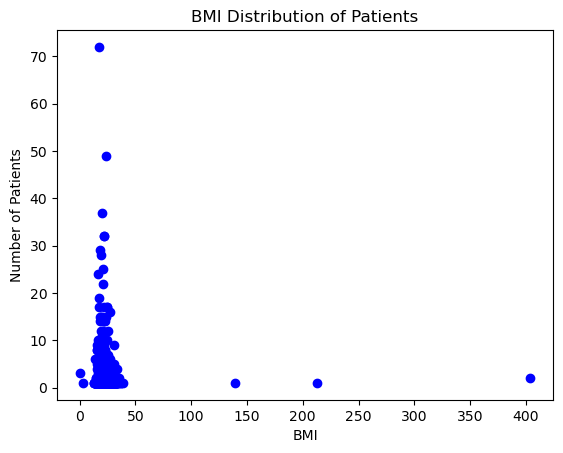

In [24]:
# 18. Finding  the overall trend or pattern in the distribution of BMI among the patients?


BMI_counts = df_Demography['BMI'].value_counts()

plt.scatter(BMI_counts.index, BMI_counts.values, color=['blue'])
plt.title('BMI Distribution of Patients')
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.show()